# Predictions

In [1]:
import os

if "visualization" in os.getcwd():
    os.chdir("..")

if "notebooks" in os.getcwd():
    os.chdir("..")
os.getcwd()

'/home/jordi/Documents/GitHub/zebra_fish'

In [2]:
from src.dataset import register_default_datasets

import matplotlib.pyplot as plt
from pathlib import Path
import glob

import detectron2
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.data import detection_utils as utils
from detectron2.utils.visualizer import Visualizer

register_default_datasets()
meta_dataset = MetadataCatalog.get("train")

In [5]:
root = Path("./ouput6")
config_path = str(root / "config.yaml")
cfg = get_cfg()
cfg.merge_from_file(config_path)
cfg.MODEL.WEIGHTS = str(root / "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.90
predictor = DefaultPredictor(cfg)

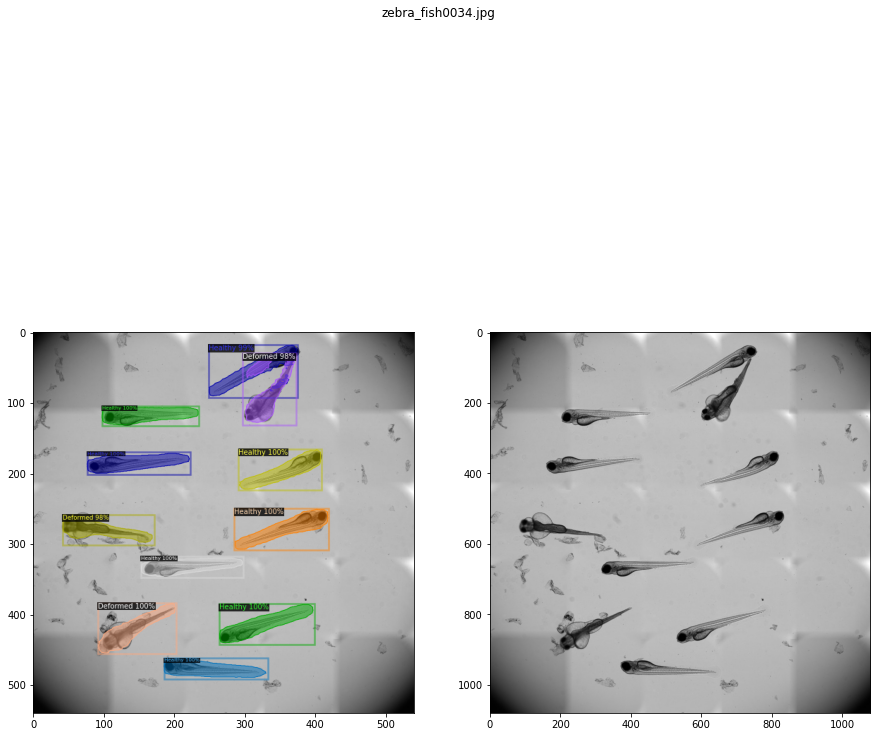

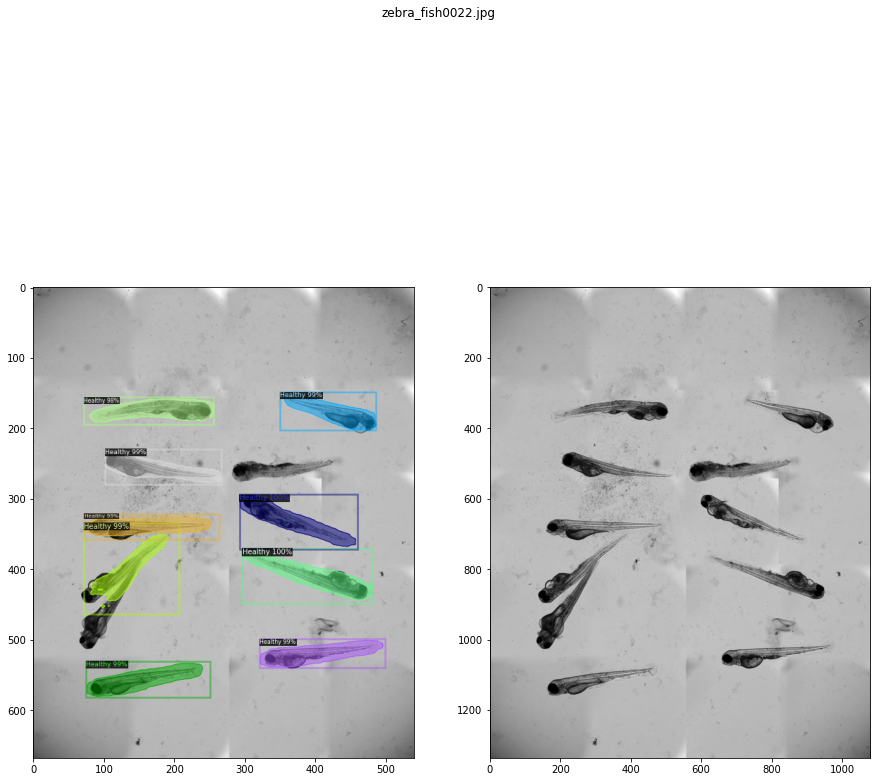

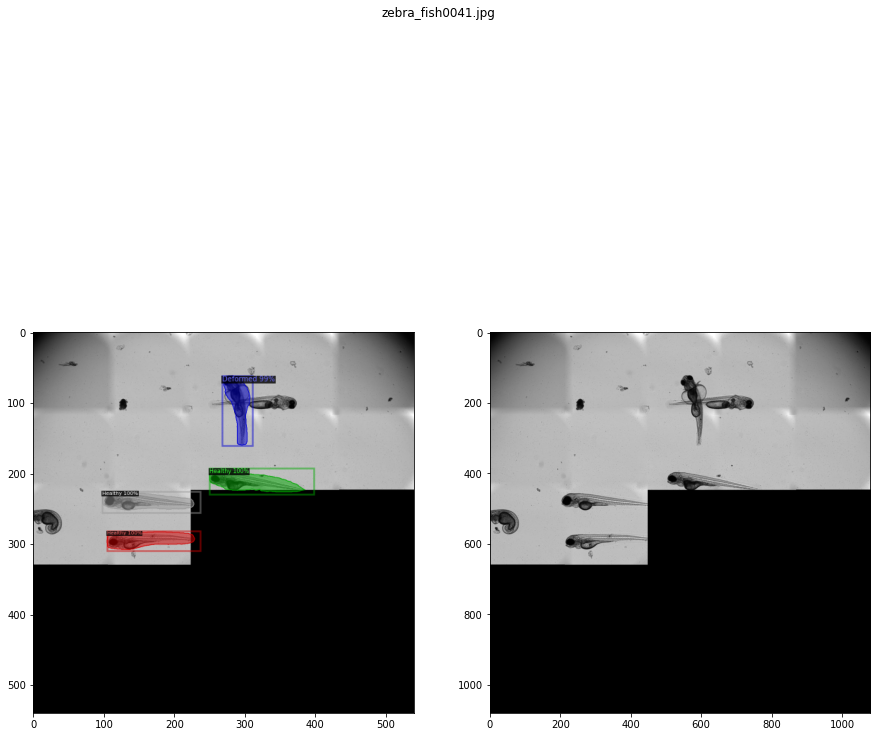

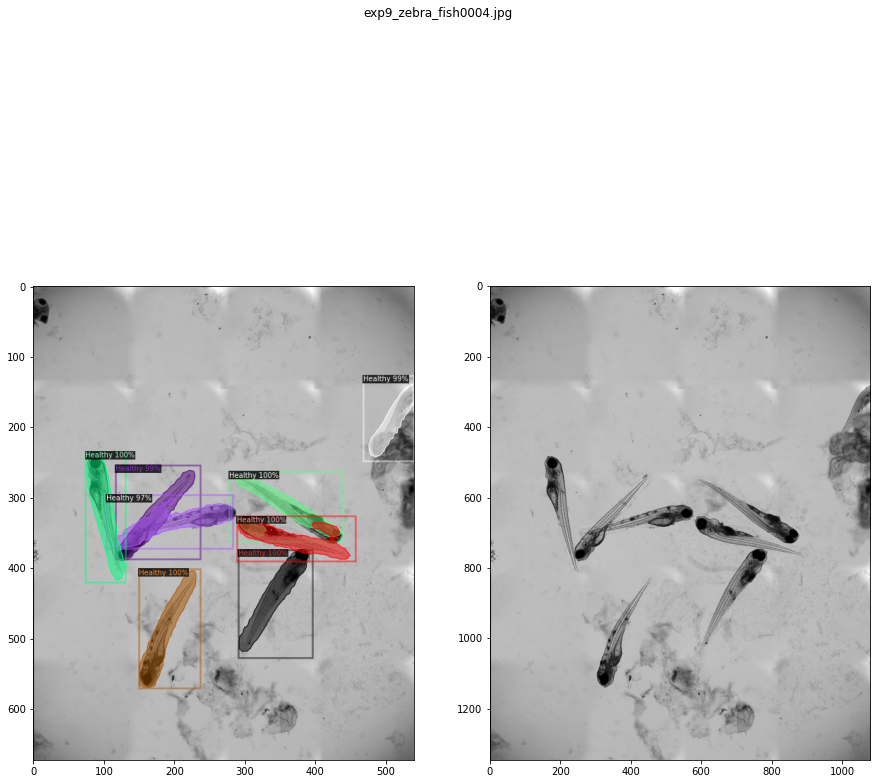

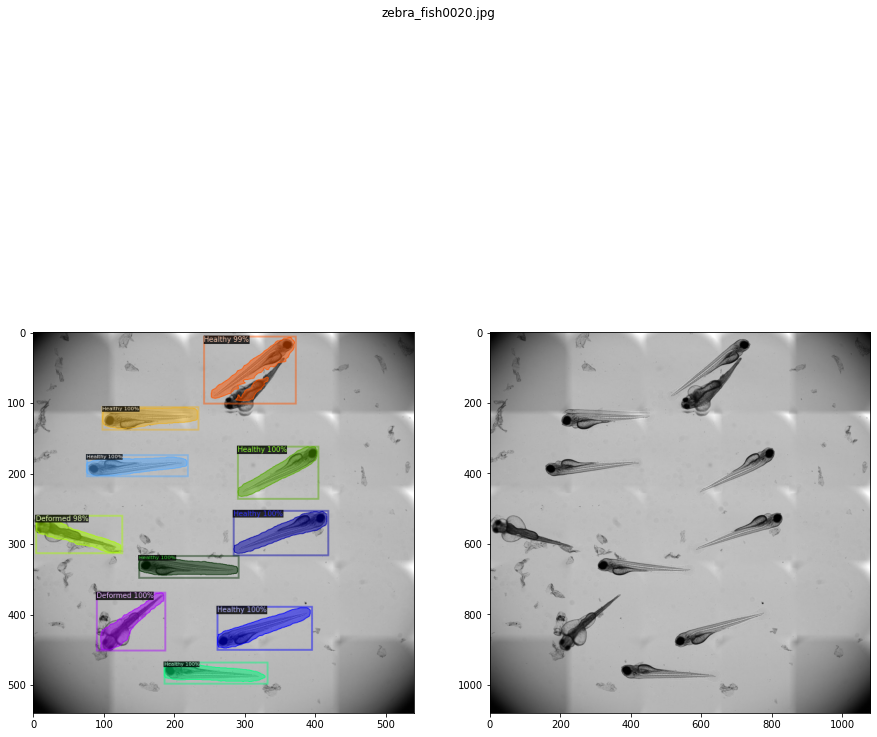

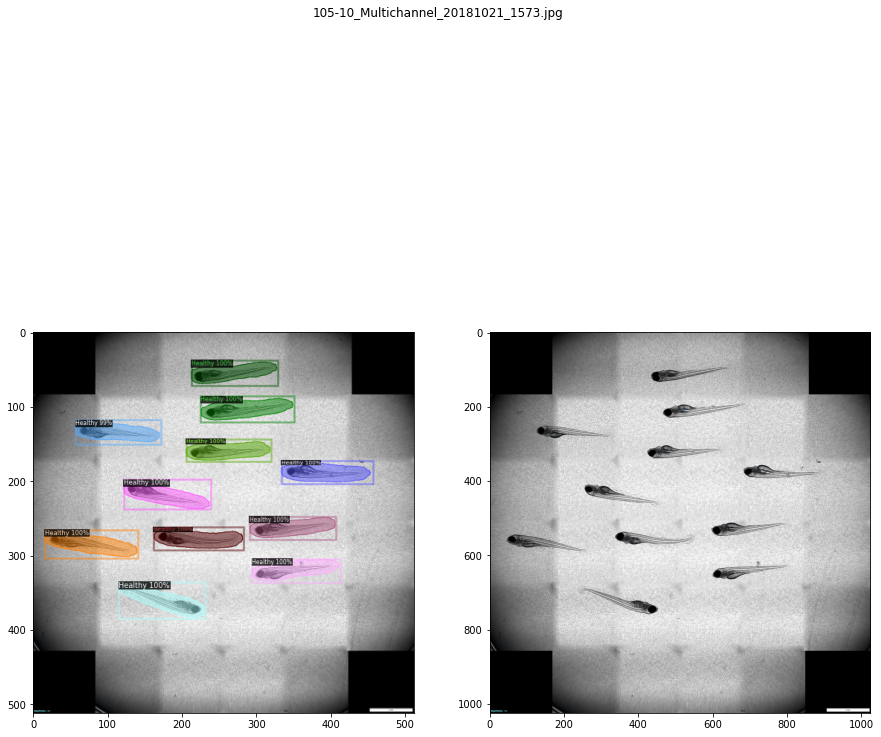

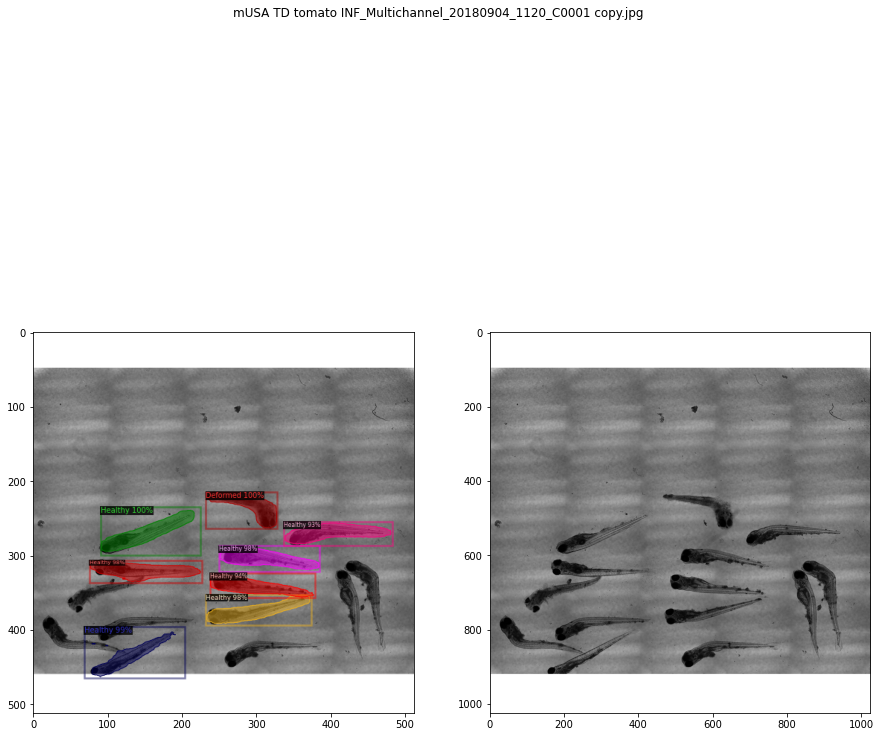

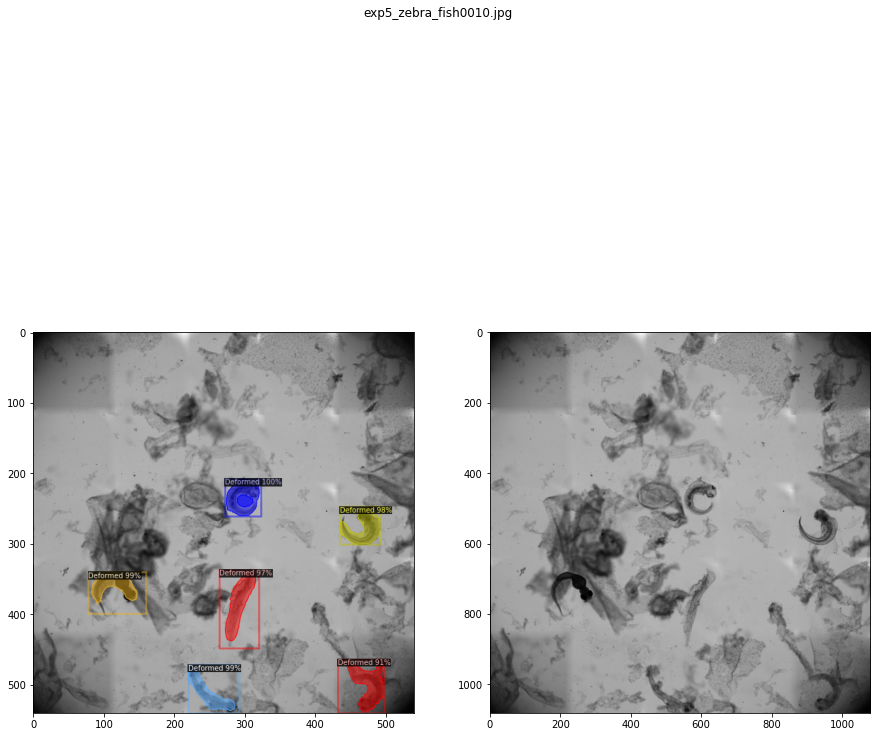

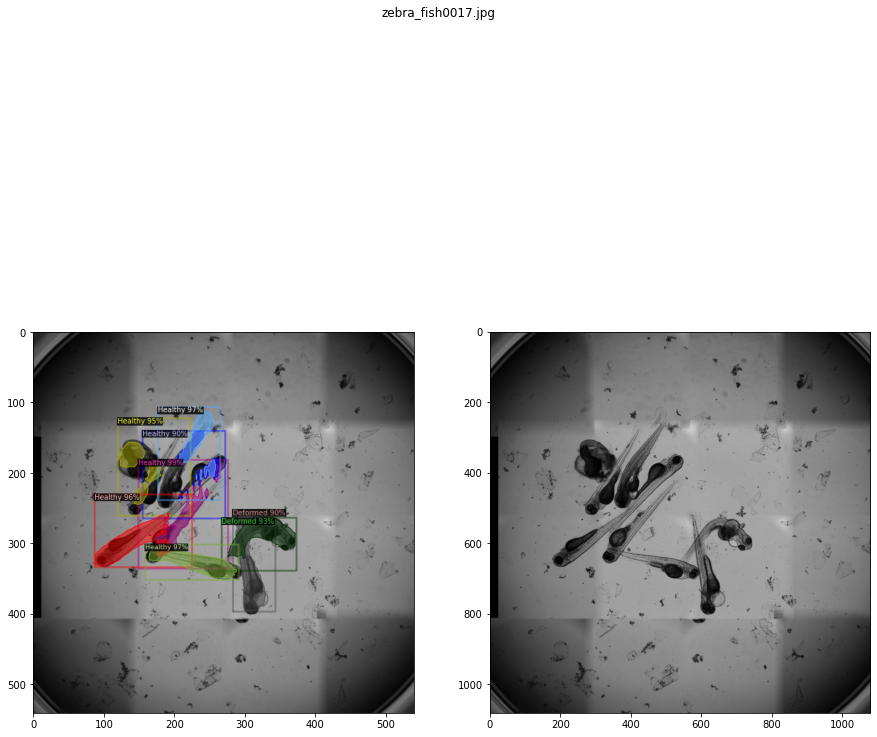

In [7]:
for image_file_name in glob.glob("dataset/test/*.jpg"):
    image_bgr = utils.read_image(image_file_name, format="BGR")

    prediction = predictor(image_bgr)
    visualizer = Visualizer(image_bgr , metadata=meta_dataset, scale=0.5)
    out = visualizer.draw_instance_predictions(prediction["instances"].to("cpu"))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

    fig.suptitle(Path(image_file_name).name)
    ax1.imshow(out.get_image())
    ax2.imshow(image_bgr)
    plt.show()